<a href="https://colab.research.google.com/github/AqsaAkmal/ToDoApp/blob/main/assignmnet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#!/bin/bash
!kaggle datasets download puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 97% 336M/346M [00:04<00:00, 47.3MB/s]
100% 346M/346M [00:04<00:00, 76.9MB/s]


In [6]:
import zipfile

# Path to the dataset
dataset_path = "/content/intel-image-classification.zip"

# Extract the dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/intel-image-classification")

print("Dataset unzipped successfully!")

Dataset unzipped successfully!


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [8]:
!pip install tensorflow


In [9]:
train_dir = "/content/intel-image-classification/seg_train/seg_train"
val_dir = "/content/intel-image-classification/seg_pred"
test_dir = "/content/intel-image-classification/seg_test/seg_test"


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='sparse'
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=32, class_mode='sparse'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='sparse', shuffle=False
)


Found 14034 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.
Found 3000 images belonging to 6 classes.


In [11]:
# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 98s 207ms/step - accuracy: 0.4985 - loss: 1.2544 - val_accuracy: 0.1170 - val_loss: 3.9561
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 206ms/step - accuracy: 0.6634 - loss: 0.8839 - val_accuracy: 0.2218 - val_loss: 3.0443
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 199ms/step - accuracy: 0.7220 - loss: 0.7490 - val_accuracy: 0.1713 - val_loss: 4.1245
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 86s 196ms/step - accuracy: 0.7506 - loss: 0.6814 - val_accuracy: 0.1494 - val_loss: 4.3655
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 205ms/step - accuracy: 0.7614 - loss: 0.6476 - val_accuracy: 0.1872 - val_loss: 5.1194
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 86s 196ms/step - accuracy: 0.7722 - loss: 0.6191 - val_accuracy: 0.1556 - val_loss: 4.6175
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 86s 195ms/step - accuracy: 0.7843 - loss: 0.5837 - val_accuracy: 0.1860 - val_loss: 4.3056
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 86s 196ms/step - accuracy: 0.7941 - loss: 0

In [14]:
!pip show tensorflow


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [15]:
!pip install tensorflow tensorflow-gpu --upgrade


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [14]:

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8714 - loss: 0.3572
Test Accuracy: 0.85


In [15]:

# Confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [16]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
Classification Report:
              precision    recall  f1-score   support

   buildings       0.79      0.88      0.83       437
      forest       0.96      0.99      0.97       474
     glacier       0.87      0.71      0.78       553
    mountain       0.77      0.83      0.80       525
         sea       0.87      0.86      0.86       510
      street       0.87      0.88      0.87       501

    accuracy                           0.85      3000
   macro avg       0.85      0.86      0.85      3000
weighted avg       0.85      0.85      0.85      3000



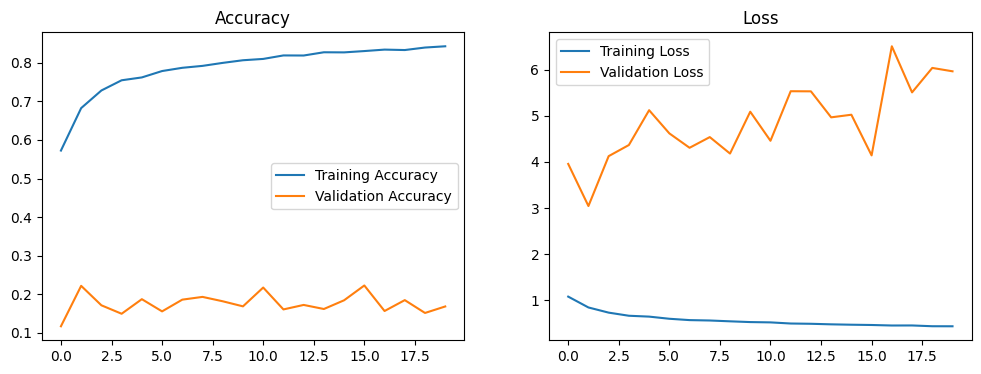

In [18]:


# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()